# The Sparks Foundation 
## Data Science & Business Analytics Internship 
### Task 01 
- **Author**: Taissir Boukrouba
- **Programming Language** : Python 
- **Description** : Predict the score percentage of a student based on the no. of hours the student spent studying.
- **Model** : a simple linear regression model as it involves just 2 variables.

## 1- Importing the libararies : 

In [128]:
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt #plotting the data (visualization)
from sklearn.linear_model import LinearRegression # the used model 
from sklearn.model_selection import train_test_split # split data 
from sklearn.metrics import mean_absolute_error # evaluate the model

## 2- Loading the data :
- Load the data and try to get a grasp of what the data wants to say

In [23]:
df= pd.read_csv("http://bit.ly/w-data")
print("Our dataframe has {} columns and {} rows".format(df.shape[0],df.shape[1]))

Our dataframe has 25 columns and 2 rows


In [17]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## 3- Data Preprocessing : 
- **Data Cleaning :** Looking for missing values and cleaning them if found
- **Data Tranformation :** Transforming all the categorical object type values to numerical values.

In [4]:
df.isnull().sum() # our data is clean , let's go to the next steps 

Hours     0
Scores    0
dtype: int64

In [6]:
df.dtypes #all of our data is numerical let's go to the next phase 

Hours     float64
Scores      int64
dtype: object

## 4- Data Visualization : 
- Data Visualization helps get more context of the data

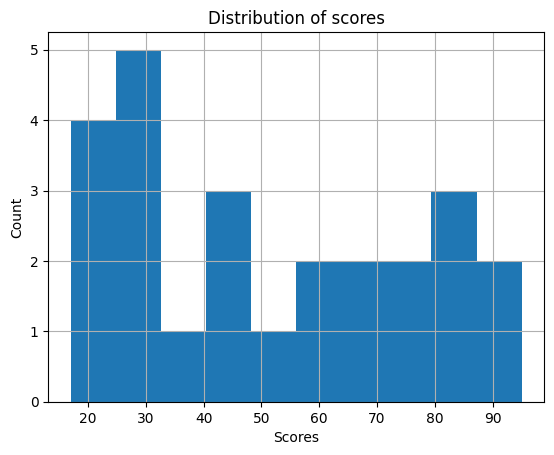

In [136]:
df["Scores"].hist()
plt.xlabel("Scores")
plt.title("Distribution of scores")
plt.ylabel("Count");

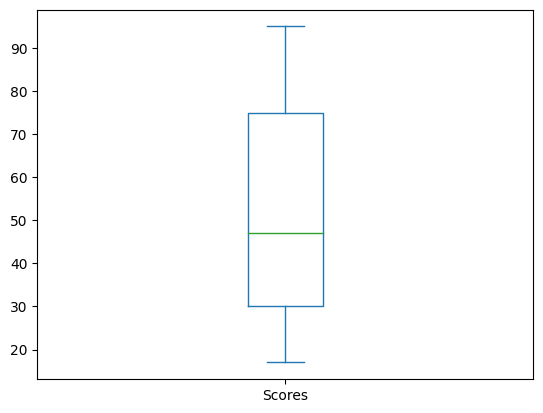

In [13]:
df["Scores"].plot(kind="box");

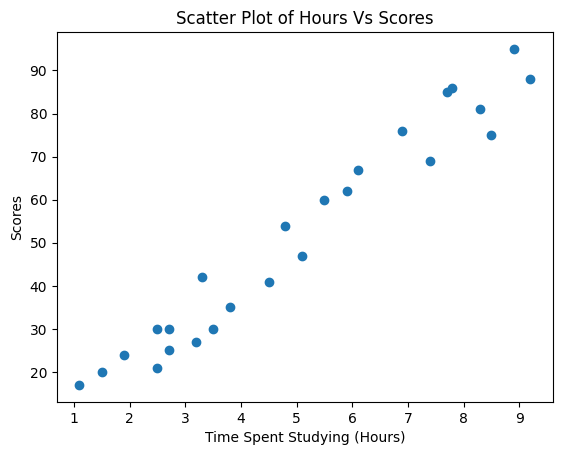

In [78]:
plt.scatter(x=df['Hours'],y=df['Scores'])
plt.xlabel("Time Spent Studying (Hours)")
plt.ylabel("Scores")
plt.title("Scatter Plot of Hours Vs Scores");

## 5- Iteration phase : 
- Splitting the data into inputs and outputs
- Spliting inputs and outputs into training and testing sets
- Training (fitting the model)
- Testing the model (prediction)

### 4.1 - Splitting the data 

In [79]:
X = df[["Hours"]].values
y = df["Scores"].values

In [80]:
X[:5]

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5]])

In [62]:
y[:5]

array([21, 47, 27, 75, 30])

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

### 4.2 - Training the model

In [84]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### 4.3 - Testing the model

In [86]:
y_pred = model.predict(X_test)
y_pred

array([17.37142335, 52.70292295, 35.03717315, 34.05574261, 46.81433968])

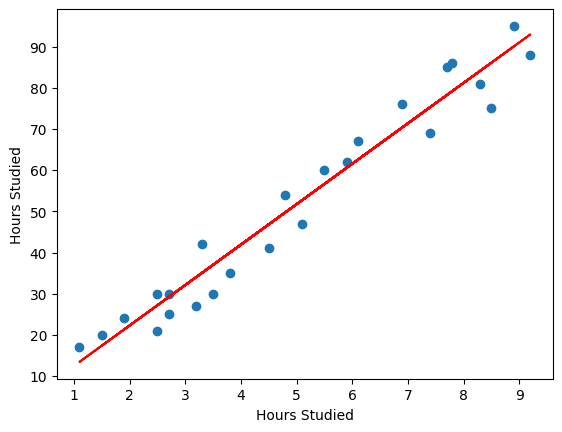

In [124]:
Regressionline = model.coef_*X+model.intercept_
plt.scatter(X, y)
plt.xlabel("Hours Studied")
plt.ylabel("Hours Studied")
plt.plot(X, Regressionline,c="red");
plt.show()

## 6 - Model Evaluation

In [108]:
act_pred = pd.DataFrame({'Real': y_test, 'Predicted': y_pred})  
act_pred

,Real,Predicted
0,20,17.371423
1,47,52.702923
2,42,35.037173
3,27,34.055743
4,41,46.814340


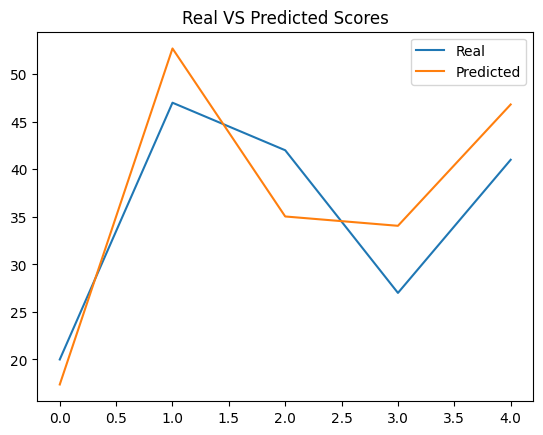

In [110]:
act_pred.plot()
plt.title("Real VS Predicted Scores");

In [113]:
mae = mean_absolute_error(y_test,y_pred)
print("The mean difference between the real and the predicted values is ",mae)

The mean difference between the real and the predicted values is  5.632881746692994


In [125]:
accuracy = model.score(X_test,y_test)
print ("Model Accuracy is {}%".format(round(accuracy*100)) )

Model Accuracy is 67%


## Answering Task's main Question 
What will be predicted score if a student studies for 9.25 hrs/ day?

In [131]:
pred = model.predict([[9.25]])
pred[0]

93.43229053722453